In [90]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df_initial = pd.read_csv('/Users/pierreloyal/Desktop/Bootcamp CA/task_auto1/ta_auto1.csv')

In [92]:
df_initial.shape

(57477, 9)

In [93]:
df_initial.head(5)

,changed_on,candidate_id,job_id,application_date,job_country_code,department,final_status_short,job_role,average_rating
0,2023-02-16T09:31:00.400806,914d6396-48ef-47f3-ad3a-538423d67bc4,faef614d-ddd4-42a4-beab-5362817dcc6b,2023-02-08T15:13:26.765207,fr,Battery Technology,New,Team Lead Battery Research Scientist,5.0
1,2023-01-28T02:19:54.432674,7c87e7e7-1a39-4688-859b-fd3e4dda013d,faef614d-ddd4-42a4-beab-5362817dcc6b,2023-01-23T14:34:03.566806,fr,Battery Technology,New,Team Lead Battery Research Scientist,2.0
2,2023-01-24T15:35:35.645826,ac7d53ef-17a8-4eef-b440-c850803eabe1,faef614d-ddd4-42a4-beab-5362817dcc6b,2023-01-23T21:10:36.754886,fr,Battery Technology,New,Team Lead Battery Research Scientist,NaN
3,2023-01-23T17:57:50.566179,df14d2a0-567f-45a7-bb0b-e483f7d04b4f,faef614d-ddd4-42a4-beab-5362817dcc6b,2023-01-22T11:24:41.800143,fr,Battery Technology,Rejected,Team Lead Battery Research Scientist,NaN
4,2023-01-26T15:38:02.947247,7a04ac76-d386-42f7-a97a-85a3d600a532,faef614d-ddd4-42a4-beab-5362817dcc6b,2023-01-26T13:56:39.219114,fr,Battery Technology,New,Team Lead Battery Research Scientist,NaN


In [94]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57477 entries, 0 to 57476
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   changed_on          57477 non-null  object 
 1   candidate_id        57477 non-null  object 
 2   job_id              57477 non-null  object 
 3   application_date    57477 non-null  object 
 4   job_country_code    57477 non-null  object 
 5   department          57477 non-null  object 
 6   final_status_short  57477 non-null  object 
 7   job_role            57477 non-null  object 
 8   average_rating      16034 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.9+ MB


In [95]:
df_initial.describe()

,average_rating
count,16034.000000
mean,3.015529
std,1.020562
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


# Task 1

## Calculation Time_to_file

In [96]:
#change to datetime
df_initial['application_date'] = pd.to_datetime(df_initial['application_date'])
df_initial['changed_on'] = pd.to_datetime(df_initial['changed_on'])


In [97]:
# Check unique values in 'final_status_short'
unique_statuses = df_initial['final_status_short'].unique()
unique_statuses

array(['New', 'Rejected', 'TA Int compl', 'Lead', 'Offer subm',
       'Offer accept', 'Hired', 'Hold', 'HT Int compl', 'Withdrawn',
       'Closing Int compl'], dtype=object)

In [98]:
# Copy with final_status_short
df_time_to_fill = df_initial[df_initial['final_status_short'].isin(['Hired'])].copy()

# time-to-fill in days
df_time_to_fill['time_to_fill_days'] = (df_time_to_fill['changed_on'] - df_time_to_fill['application_date']).dt.days

# Average time-to-fill
average_time_to_fill = df_time_to_fill['time_to_fill_days'].mean()

print(f"Average time-to-fill (days): {average_time_to_fill}")

Average time-to-fill (days): 39.295833333333334


## Conversion Rate at each Stage

In [99]:
# Counts for each stage
stage_counts = df_initial['final_status_short'].value_counts()

# Conversion rate from 'New' to 'Offer subm'
# Assume candidates move through the process linearly
stages = ['New', 'TA Int compl', 'Lead', 'Offer subm', 'Offer accept', 'Hired']

conversion_rates = {}
for i in range(len(stages) - 1):
    current_stage = stages[i]
    next_stage = stages[i + 1]
    if stage_counts.get(current_stage, 0) > 0:
        conversion_rate = (stage_counts.get(next_stage, 0) / stage_counts.get(current_stage, 0)) * 100
        conversion_rates[f'{current_stage} to {next_stage}'] = conversion_rate


for stage, rate in conversion_rates.items():
    print(f"Conversion rate from {stage}: {rate:.2f}%")

Conversion rate from New to TA Int compl: 11.46%
Conversion rate from TA Int compl to Lead: 113.71%
Conversion rate from Lead to Offer subm: 15.26%
Conversion rate from Offer subm to Offer accept: 52.15%
Conversion rate from Offer accept to Hired: 98.77%


## Offer Acceptance

In [100]:
# Offers accepted / Offers submitted
offers_submitted = stage_counts.get('Offer subm', 0)
offers_accepted = stage_counts.get('Offer accept', 0)

if offers_submitted > 0:
    offer_acceptance_rate = (offers_accepted / offers_submitted) * 100
else:
    offer_acceptance_rate = 0

print(f"Offer Acceptance Rate: {offer_acceptance_rate:.2f}%")

Offer Acceptance Rate: 52.15%


# Task 2

1. Early Stage Drop-off (New to TA Int compl):
Only 11.46% of candidates progress from the initial "New" status to the first interview ("TA Int compl"). This suggests a significant filtering or lack of candidate engagement early on, potentially missing out on qualified candidates.

2. Lead to Offer Submission:
Only 15.26% of candidates in the "Lead" stage advance to the offer submission. This indicates a strong reduction at this stage, possibly due to strict criteria or inefficiencies in moving candidates forward.

# Task 3

1. Time-to-Fill: 
At 39.3 days, Auto1's time-to-fill is better than the industry benchmark of 43 days but could be further improved.

2. Offer Acceptance Rate: 
The current rate of 52.15% is below the benchmark of 55.6%, indicating a need to improve offer competitiveness or engagement.

3. Conversion Rate (New to TA Int compl): 
Auto1's conversion rate of 11.46% is below the industry average, suggesting stricter early-stage filtering and room for improvement in candidate progression.

Sources: Jobvite, "7 Benchmark Metrics to Improve Your Recruiting Funnel"​
https://www.jobvite.com/blog/recruiting-funnel/

# Task 4

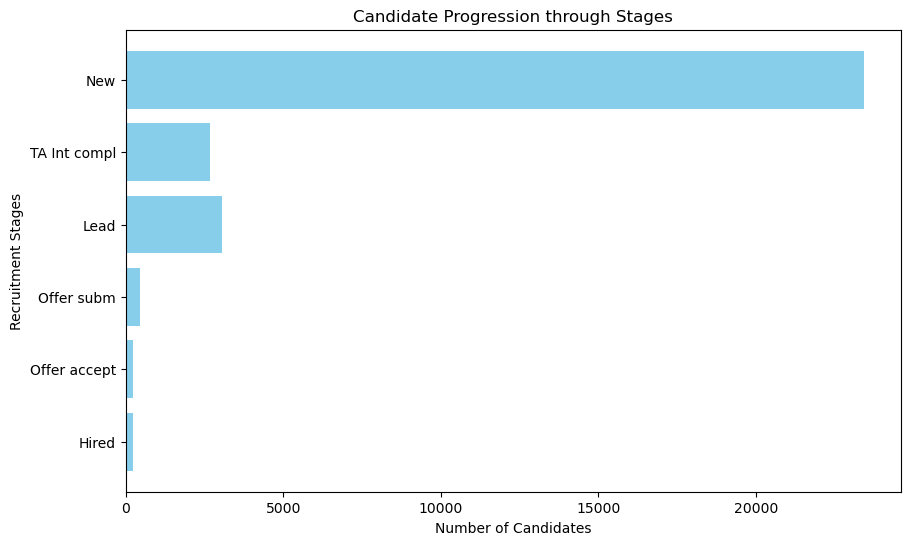

In [101]:
# Visualization of key metrics
# Stage counts for funnel visualization
stage_names = ['New', 'TA Int compl', 'Lead', 'Offer subm', 'Offer accept', 'Hired']
stage_counts_ordered = [stage_counts.get(stage, 0) for stage in stage_names]

# 1. Funnel visualization for candidate progression
plt.figure(figsize=(10, 6))
plt.barh(stage_names, stage_counts_ordered, color='skyblue')
plt.title("Candidate Progression through Stages")
plt.xlabel("Number of Candidates")
plt.ylabel("Recruitment Stages")
plt.gca().invert_yaxis()
plt.show()

In [102]:
import plotly.express as px

# Candidate stages and counts
stages = ['New', 'TA Int compl', 'Lead', 'Offer subm', 'Offer accept', 'Hired']
stage_counts_ordered = [stage_counts.get(stage, 0) for stage in stages]

# Create a funnel chart
fig = px.funnel(
    y=stages, 
    x=stage_counts_ordered, 
    title="Candidate Progression Funnel",
    labels={'x': 'Number of Candidates', 'y': 'Recruitment Stages'}
)

fig.show()

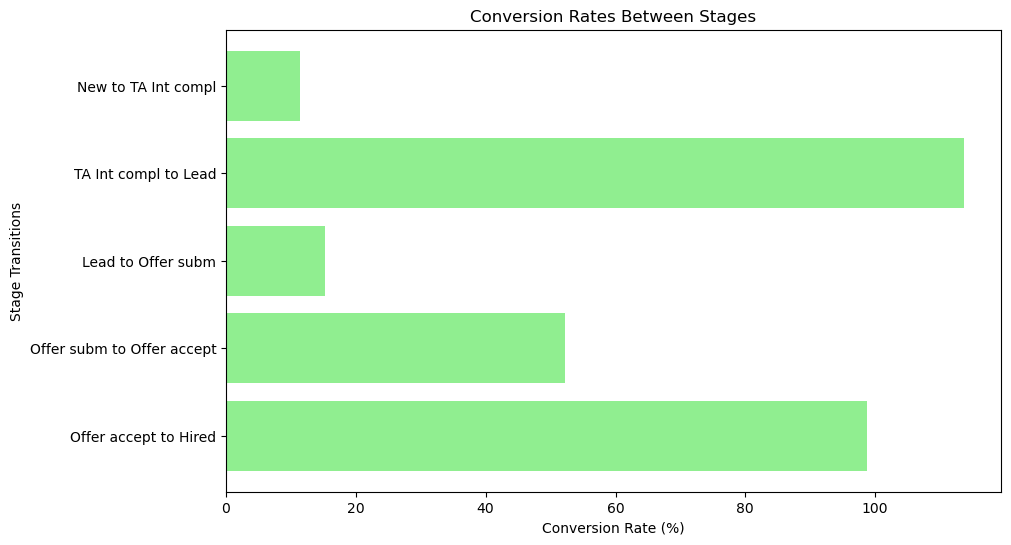

In [103]:
# 2. Conversion rate visualization
conversion_stage_names = list(conversion_rates.keys())
conversion_stage_rates = list(conversion_rates.values())

plt.figure(figsize=(10, 6))
plt.barh(conversion_stage_names, conversion_stage_rates, color='lightgreen')
plt.title("Conversion Rates Between Stages")
plt.xlabel("Conversion Rate (%)")
plt.ylabel("Stage Transitions")
plt.gca().invert_yaxis()
plt.show()


In [104]:
import plotly.graph_objects as go

# stages and conversions
stages = ['New', 'TA Int compl', 'Lead', 'Offer subm', 'Offer accept', 'Hired']
conversion_rates = list(conversion_rates.values())

# nodes and links 
fig = go.Figure(go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 0.5),
        label = stages
    ),
    link = dict(
        source = [0, 1, 2, 3, 4],  
        target = [1, 2, 3, 4, 5],  
        value = conversion_rates  
    )
))

fig.update_layout(title_text="Candidate Conversion Rates Between Stages", font_size=10)
fig.show()


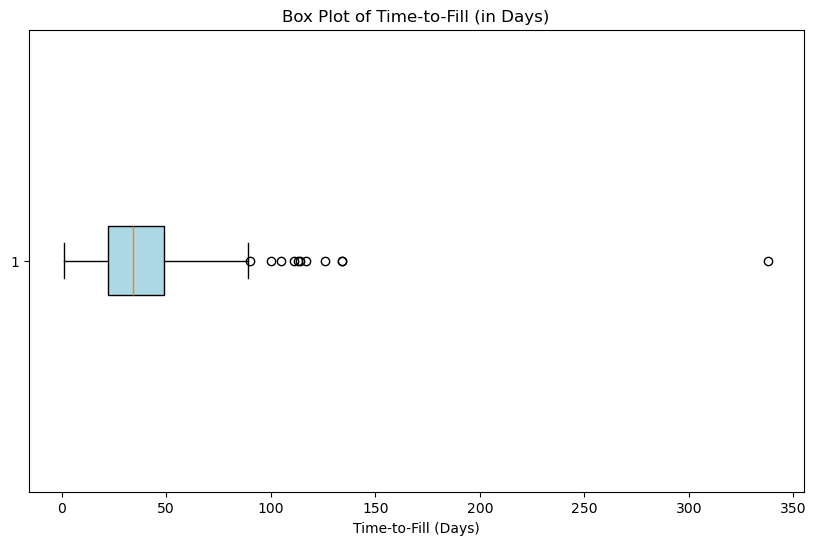

In [105]:
# Box Plot for Time-to-Fill
plt.figure(figsize=(10, 6))
plt.boxplot(df_time_to_fill['time_to_fill_days'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue'))
plt.title("Box Plot of Time-to-Fill (in Days)")
plt.xlabel("Time-to-Fill (Days)")
plt.show()

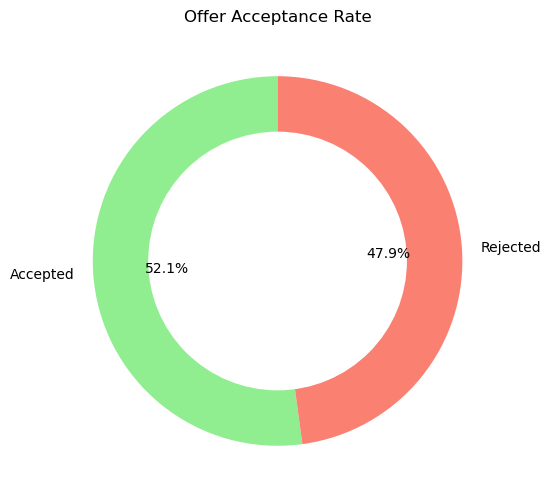

In [106]:
import matplotlib.pyplot as plt

# Data offer acceptance rate
offers_submitted = stage_counts.get('Offer subm', 0)
offers_accepted = stage_counts.get('Offer accept', 0)
offers_rejected = offers_submitted - offers_accepted

# Pie chart data
labels = ['Accepted', 'Rejected']
sizes = [offers_accepted, offers_rejected]

# donut chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.title("Offer Acceptance Rate")
plt.show()


## Task 6

1. Early Drop-offs: There’s a big drop from "New" to "TA Int compl" stages, which is slowing things down. Boosting early-stage conversions could help speed things up.

2. Low Conversions: Candidates aren’t moving through the early stages fast enough, especially from "New" to the first interview. Improving this would reduce delays.

3. Outliers in Time-to-Fill: A few roles are taking over 100 days to fill, which is dragging the average up. Fixing these outliers would help a lot.

4. Offer Acceptance Rate: The acceptance rate is okay, which means offer negotiations might be taking longer. Improving this could cut down hiring time.

# Task 7

final_status_short
Closing Int compl    3.724138
HT Int compl         3.629096
Hired                4.000000
Hold                 3.287167
Lead                 3.142589
New                  2.822660
Offer accept         4.004219
Offer subm           4.026144
Rejected             2.610379
TA Int compl         3.098800
Withdrawn            3.298731
Name: average_rating, dtype: float64


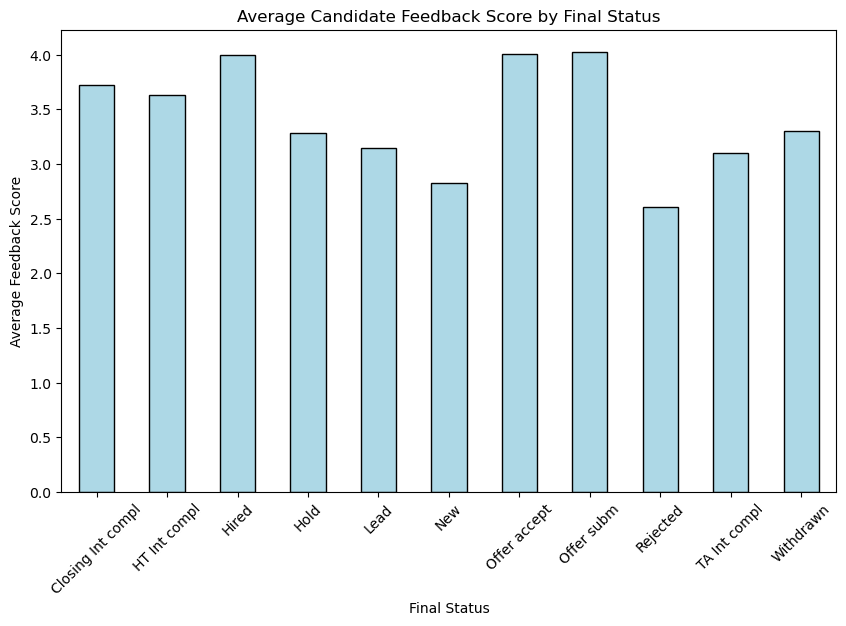

In [107]:
# Compare the average_rating with the final_status_short

# Drop missing values for 'average_rating'
df_feedback = df_initial[['average_rating', 'final_status_short']].dropna()

# Group by 'final_status_short' and calculate mean rating for each status
avg_rating_by_status = df_feedback.groupby('final_status_short')['average_rating'].mean()

print(avg_rating_by_status)

# bar chart
plt.figure(figsize=(10, 6))
avg_rating_by_status.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title("Average Candidate Feedback Score by Final Status")
plt.xlabel("Final Status")
plt.ylabel("Average Feedback Score")
plt.xticks(rotation=45)
plt.show()


1. Highest Satisfaction: Candidates in the offer stages (Offer subm: 4.03, Offer accept: 4.00) and those hired (4.00) provided the best feedback.

2. Lowest Satisfaction: Rejected candidates (2.61) and those in the New stage (2.82) were the least satisfied, indicating room for improvement early in the process and in rejection handling.

3. Mixed Feedback: Stages like Hold (3.29) and Withdrawn (3.30) show moderate satisfaction, possibly due to delays or uncertainty.

# Task 8

1. Enhance Early-Stage Candidate Experience (Short-Term)
Focus on better communication with candidates in the early stages, especially those rejected. FOcus on the initial process and provide timely feedback to keep them engaged.
2. Optimize with Data (Mid-Term)
Use data to identify bottlenecks, like slow progress from "New" to interview stages, and play with processes. Adjust selection criteria or automate early screenings to speed things up.
3. Adopt AI and Predictive Analytics (Long-Term)
Integrate AI tools to improve candidate matching and reduce bias. Automate tasks like scheduling so HR can focus on strategic activities, improving the quality of hires.